In [20]:

import numpy as np
import control
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
import os

SAVE_PATH = 'report/figs/'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)
plt.rcParams['figure.figsize'] = [4, 4]

In [21]:
# var 17
theta = 8
lambda_ = 2
g_t = lambda t: np.cos(4 * t)

$$\dot x_m = -\lambda x_m + \lambda g $$

In [22]:
def d_xm(t, x_m, lambda_, g_t):
    return - lambda_ * x_m + lambda_ * g_t(t)

$$
    \begin{cases}
      \dot x = \theta x + u\\
      u = - \theta x - \lambda x + \lambda g
    \end{cases} \rightarrow
    \dot x = - \lambda x + \lambda g
$$

In [4]:
def u(t, x, theta_t, g_t, lambda_):
    return - theta_t(t) * x - lambda_ * x + lambda_ * g_t(t)

def d_x(t, x, lambda_, g_t, theta_t):
    return theta_t(t) * x + u(t, x, theta_t, g_t, lambda_)

def theta_t(t):
    theta_a = np.zeros_like(t)
    if type(t) is not np.ndarray:
        t = np.array(t)
    theta_a[t<9] = theta * 9
    theta_a[t<6] = theta * 3
    theta_a[t<3] = theta
    return theta_a

In [5]:
t_span = [0, 9]
y0 = [0]
sol_xm = solve_ivp(d_xm, t_span=t_span, t_eval=np.linspace(*t_span, 1000), y0=y0, args=(lambda_, g_t))
sol_x = solve_ivp(d_x, t_span=t_span, t_eval=np.linspace(*t_span, 1000), y0=y0, args=(lambda_, g_t, theta_t))

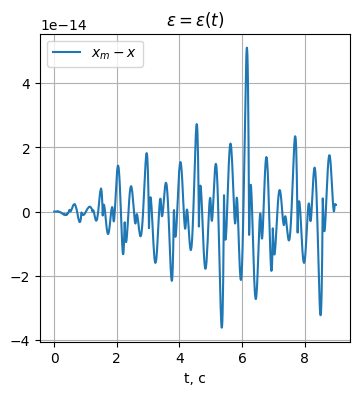

In [6]:
plt.plot(sol_x.t, sol_xm.y[0] - sol_x.y[0], label='$x_m - x$')
# plt.plot(sol_xm.t, sol_xm.y[0], label='$x$')
plt.legend()
plt.grid()
plt.xlabel('t, c')
plt.title('$\\varepsilon = \\varepsilon(t)$')
plt.savefig(SAVE_PATH + '1_y.png')

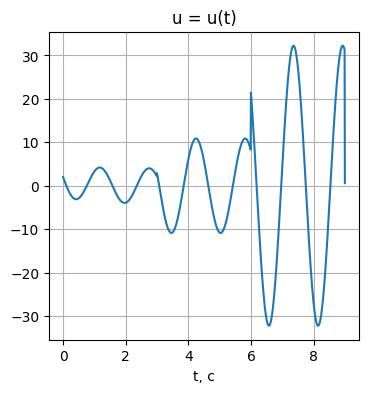

In [7]:
u = - theta_t(sol_x.t) * sol_x.y - lambda_ * sol_x.y + lambda_ * g_t(sol_x.t)
plt.plot(sol_x.t, u.T)
plt.grid()
plt.xlabel('t, c')
plt.title('u = u(t)')
plt.savefig(SAVE_PATH + '1_u.png')

In [8]:
def d_xm(t, x_m, lambda_, g_t):
    return - lambda_ * x_m + lambda_ * g_t(t)

def u_func(t, x, theta, g_t, lambda_):
    return - theta * x - lambda_ * x + lambda_ * g_t(t)

def d_x(t, x, lambda_, g_t, theta, theta_hat):
    return theta * x + u_func(t, x, theta_hat, g_t, lambda_)

def d_theta_hat(x, epsilon, gamma):
    return -gamma * epsilon * x


def system(t, y, lambda_, g_t, gamma, theta):
    x_m, x, theta_hat = y
    return (
        d_xm(t, x_m, lambda_, g_t),
        d_x(t, x, lambda_, g_t, theta, theta_hat),
        d_theta_hat(x, x_m - x, gamma)
    )

In [9]:
gamma = 1000
sol_2 = solve_ivp(system, t_span=t_span, t_eval=np.linspace(*t_span, 1000), y0=np.array([1, 0, 8]).T, args=(lambda_, g_t, gamma, theta))

xm, x, theta_hat = sol_2.y
t = sol_2.t

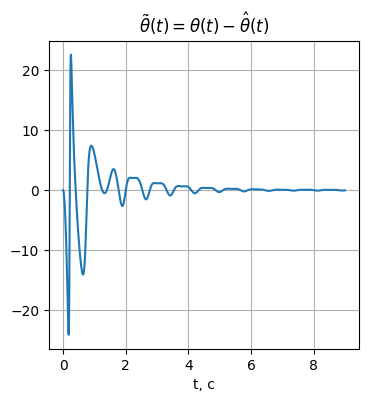

In [10]:
plt.plot(sol_2.t, sol_2.y[2] - theta)
plt.grid()
plt.title('$\\tilde \\theta(t) = \\theta(t) - \\hat \\theta(t)$')
plt.xlabel('t, c')

plt.savefig(SAVE_PATH + '2_theta.png')

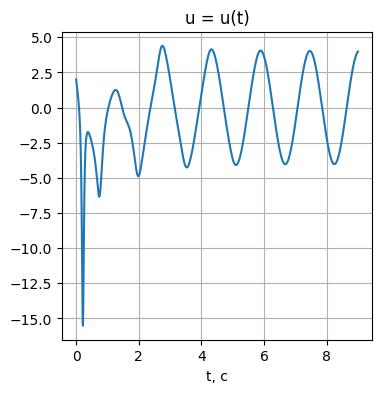

In [11]:
u = u_func(t, x, theta, g_t, lambda_)
plt.plot(t, u.T)
plt.grid()
plt.title('u = u(t)')
plt.xlabel('t, c')
plt.savefig(SAVE_PATH + '2_u.png')

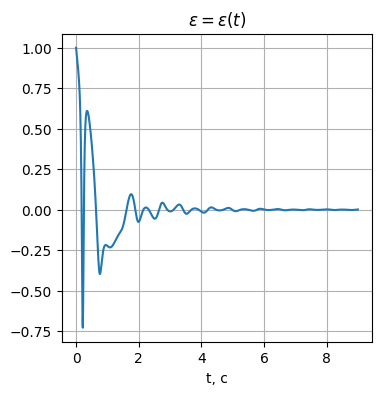

In [12]:
plt.plot(t, xm - x)
plt.grid()
plt.xlabel('t, c')
plt.title('$\\varepsilon = \\varepsilon(t)$')
plt.savefig(SAVE_PATH + '2_y.png')

# 3

In [13]:
gammas = [50, 100, 5000]

Text(0.5, 1.0, '$\\varepsilon = \\varepsilon(t)$')

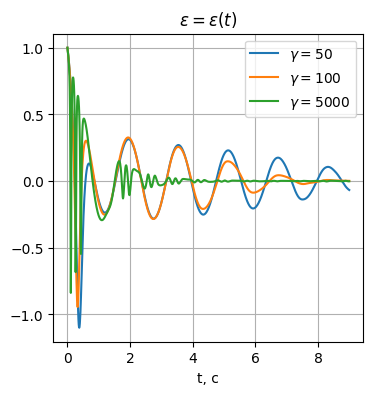

In [19]:
for gamma in gammas:
    sol_2 = solve_ivp(system, t_span=t_span, t_eval=np.linspace(*t_span, 1000), y0=np.array([1, 0, 1]).T, args=(lambda_, g_t, gamma, theta))

    xm, x, theta_hat = sol_2.y
    t = sol_2.t

    plt.plot(t, xm - x, label=f'$\gamma = {gamma}$')
plt.grid()
plt.legend()
plt.xlabel('t, c')
plt.title('$\\varepsilon = \\varepsilon(t)$')


plt.savefig(SAVE_PATH + '3_y.png')

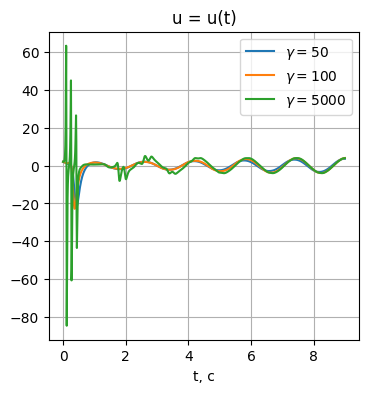

In [15]:
for gamma in gammas:
    sol_2 = solve_ivp(system, t_span=t_span, t_eval=np.linspace(*t_span, 1000), y0=np.array([1, 0, 1]).T, args=(lambda_, g_t, gamma, theta))

    xm, x, theta_hat = sol_2.y
    t = sol_2.t
    
    u = u_func(t, x, theta_hat, g_t, lambda_)
    plt.plot(t, u.T, label=f'$\gamma = {gamma}$')
plt.grid()
plt.legend()
plt.xlabel('t, c')
plt.title('u = u(t)')


plt.savefig(SAVE_PATH + '3_u.png')

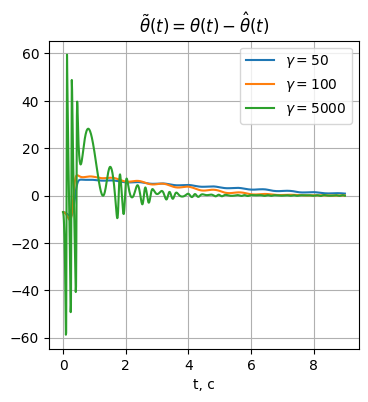

In [16]:
for gamma in gammas:
    sol_2 = solve_ivp(system, t_span=t_span, t_eval=np.linspace(*t_span, 1000), y0=np.array([1, 0, 1]).T, args=(lambda_, g_t, gamma, theta))

    xm, x, theta_hat = sol_2.y
    t = sol_2.t
    
    u = u_func(t, x, theta, g_t, lambda_)
    plt.plot(sol_2.t, sol_2.y[2] - theta, label=f'$\gamma = {gamma}$')
plt.grid()
plt.legend()
plt.xlabel('t, c')
plt.title('$\\tilde \\theta(t) = \\theta(t) - \\hat \\theta(t)$')


plt.savefig(SAVE_PATH + '3_theta.png')